In [2]:
!pip install folium

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
calendar_df = pd.read_csv('calendar.csv')
listings_df = pd.read_csv('listings.csv')
reviews_df = pd.read_csv('reviews.csv')

In [5]:
calendar_df

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [84]:
listings_df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [7]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


##### We'll Focus on listings_df for now

In [9]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [80]:
listings_df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [11]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [12]:
listings_df.shape

(3818, 92)

In [13]:
pd.options.display.max_rows = 100

In [14]:
listings_df.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [131]:
# Fill null values
listings_df.fillna({'reviews_per_month':0},inplace=True)

##### Check for unique values

In [16]:
room_types = listings_df['room_type'].unique()
neighborhood_group = listings_df['neighbourhood_group_cleansed'].unique()
property_types = listings_df['property_type'].unique()
print("Room Types", room_types)
print("Neighborhood Group", neighborhood_group)
print("Property Types", property_types)

Room Types ['Entire home/apt' 'Private room' 'Shared room']
Neighborhood Group ['Queen Anne' 'Ballard' 'Other neighborhoods' 'Cascade' 'Central Area'
 'University District' 'Downtown' 'Magnolia' 'West Seattle' 'Interbay'
 'Beacon Hill' 'Rainier Valley' 'Delridge' 'Seward Park' 'Northgate'
 'Capitol Hill' 'Lake City']
Property Types ['Apartment' 'House' 'Cabin' 'Condominium' 'Camper/RV' 'Bungalow'
 'Townhouse' 'Loft' 'Boat' 'Bed & Breakfast' 'Other' 'Dorm' 'Treehouse'
 'Yurt' 'Chalet' 'Tent' nan]


#### Visualizations

##### Plot Dataset on a Map

In [19]:
# Import folium libraries
import folium
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

In [20]:
lat = listings_df['latitude'].mode()[0]
long = listings_df['longitude'].mode()[0]
print(lat, long)

47.50508834369015 -122.4172188142562


In [21]:
locations = list(zip(listings_df.latitude, listings_df.longitude))

map1 = folium.Map(location=[lat, long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

##### Show neighborhood group based on latitude and longitude

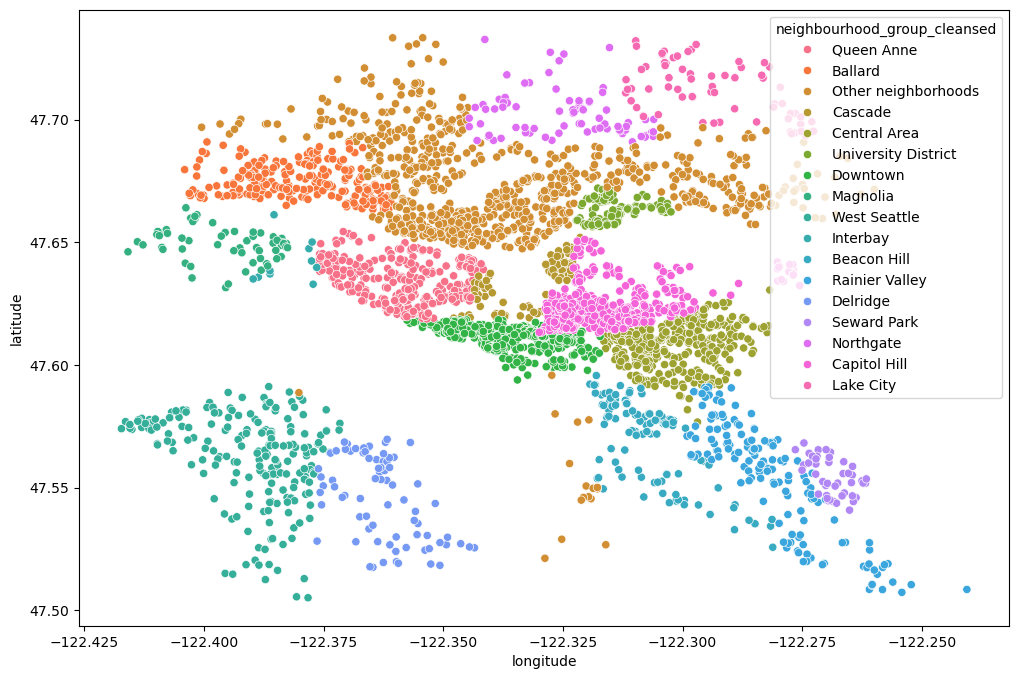

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=listings_df['longitude'], y=listings_df['latitude'], hue=listings_df['neighbourhood_group_cleansed'])
plt.show()

##### Distribution of room types and property types

<Axes: title={'center': 'Count of rooms'}, xlabel='room_type', ylabel='count'>

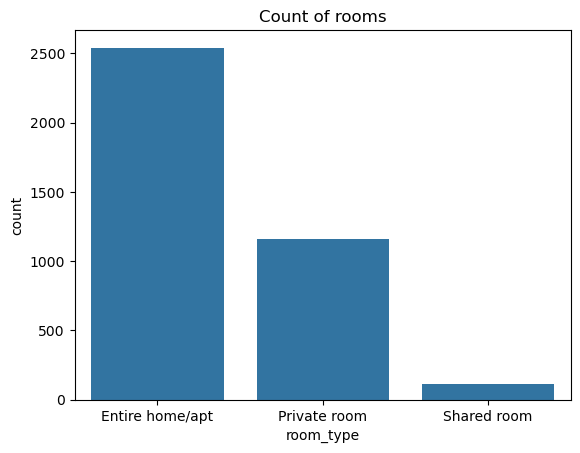

In [25]:
room_type = listings_df['room_type'].value_counts()
plt.title("Count of rooms")
sns.countplot(listings_df, x='room_type')

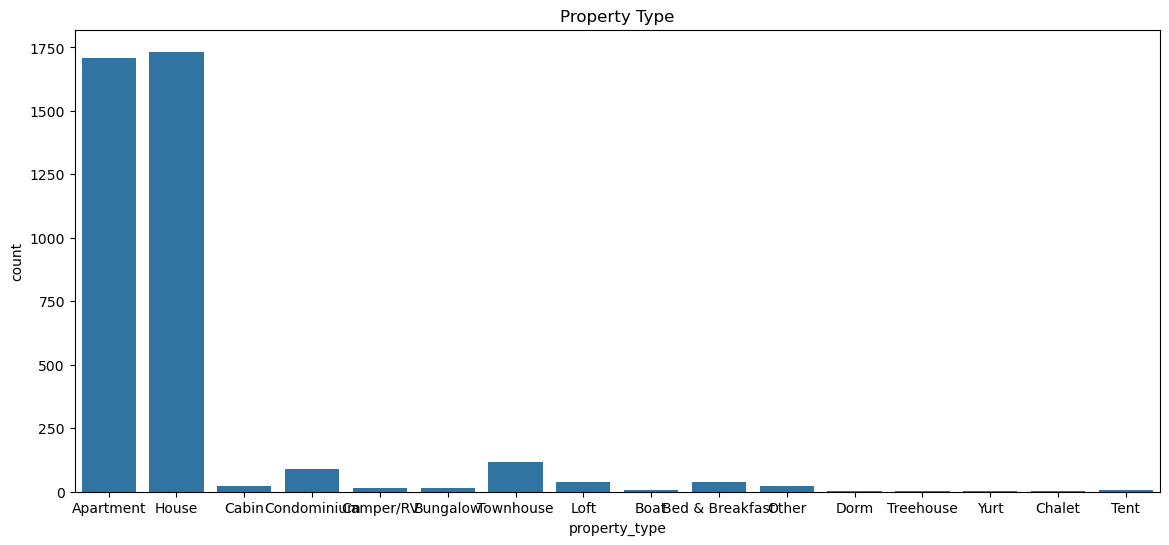

In [26]:
plt.figure(figsize=(14,6))
plt.title("Property Type")
sns.countplot(listings_df, x='property_type')
plt.show()

##### Top 10 Private rooms

In [28]:
private = listings_df[listings_df['room_type']=='Private room']
list_private = private.groupby(['host_id', 'host_name', 'neighbourhood']).size().reset_index(name='private').sort_values(by=['private'], ascending=False)
list_private.head(10)

,host_id,host_name,neighbourhood,private
10,50893,Chris,Capitol Hill,6
626,26967583,Dario,Seward Park,6
70,862329,Prez & Cherie,North Beacon Hill,6
422,12796487,"Emma, Shannon, Anna & Rachel",Stevens,6
627,26967583,Dario,University District,5
139,2409388,Lisa,Bryant,5
267,5820099,Forest And Andy,Capitol Hill,5
612,26378802,Chelsi,North Admiral,4
27,215230,Carol,Wedgewood,4
342,8932486,Paul,Minor,4


##### Price relationship with other variables

In [94]:
listings_df['price'] = listings_df['price'].replace('[$,]', '', regex=True).astype(float)
price = listings_df['price']
price

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [96]:
listings_df.price.isnull().sum()

0

In [98]:
# Describe price ranges
listings_df['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

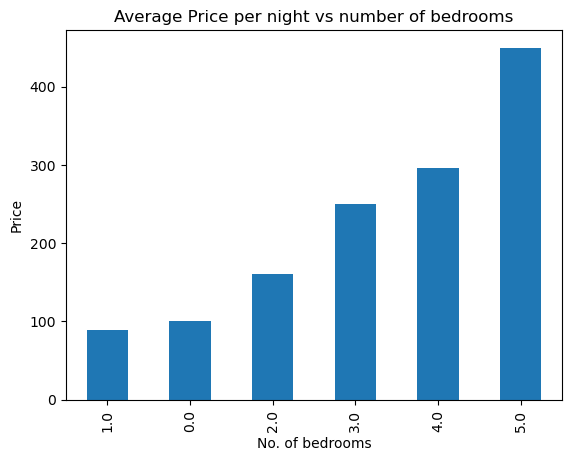

In [120]:
# Price vs rooms
df = listings_df[listings_df['minimum_nights']==1]
df1 = df.groupby('bedrooms')['price'].mean().sort_values(ascending=True)
plt.title("Average Price per night vs number of bedrooms")
df1.plot(kind='bar')
plt.xlabel("No. of bedrooms")
plt.ylabel("Price")
plt.show()

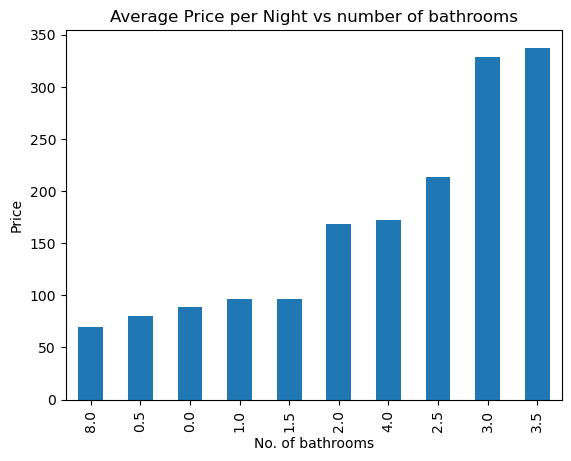

In [122]:
df2 = df.groupby('bathrooms')['price'].mean().sort_values(ascending=True)
plt.title("Average Price per Night vs number of bathrooms")
df2.plot(kind='bar')
plt.xlabel("No. of bathrooms")
plt.ylabel("Price")
plt.show()

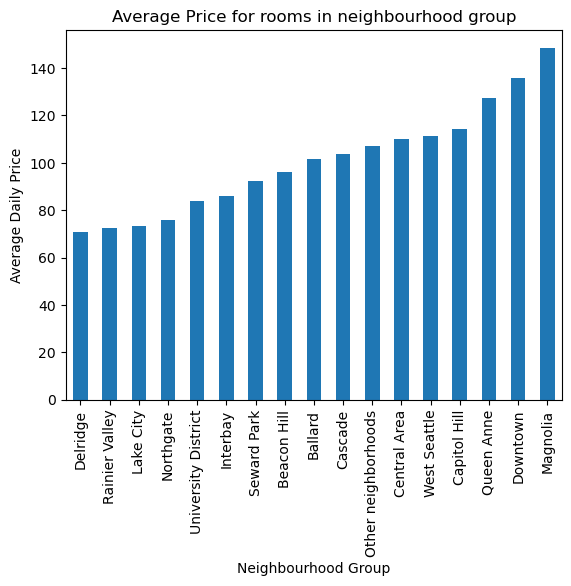

In [118]:
# Average Price per night based on neighbourhood group
df3 = df.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=True)
plt.title("Average Price for rooms in neighbourhood group")
df3.plot(kind='bar')
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Daily Price")
plt.show()

<Axes: title={'center': 'Cancellation Policy'}, xlabel='cancellation_policy', ylabel='count'>

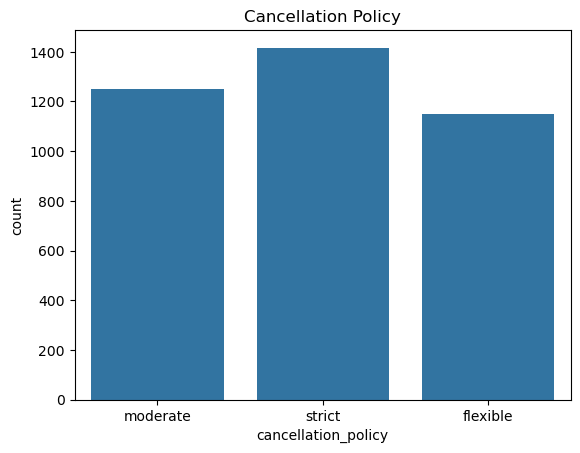

In [126]:
plt.title('Cancellation Policy')
sns.countplot(listings_df, x='cancellation_policy')

##### Location and Review Score

In [ ]:
# Neighbourhood groups with more than 50 reviews
review_50 = listings_df[listings_df['number_of_reviews']>=50]
df2 = review_50['neighbourhood_group_cleansed'].value_counts()
